<a href="https://colab.research.google.com/github/RassRR/Homeworks/blob/main/%D0%94%D0%97_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:

#загрузка данных
dataset = pd.read_csv(r"https://raw.githubusercontent.com/Allyonzy/ArchitectInno2023/c84ae958de2c51da8e82256fdec16083582236d0/pandas_matplotlib/diabetes.csv")

dataset.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:

dataset.isnull().mean() # проверка пропущенных значений

dataset.columns = [col.lower() for col in dataset.columns]
dataset.columns



Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

EDA - исследовательский анализ данных

In [6]:
# Разделение X (data features) и y (outcome)

X = dataset.drop(columns=['outcome'])
y = dataset['outcome']
px.box(X)



In [12]:
X.describe(percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,17.00
glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,846.00
bmi,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,2.42
age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,81.00


Подготовка данных

In [23]:
MODEL_PARAMS = {'n_neighbors':np.arange(5,25,5)}

best_score = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_set_model, scores = knn_classifier_wapper(X_train25, y_train25, k, knn_model)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
      best_score = avg_score
      best_n_neighbors = k
print(f"Лучший k по score - {best_n_neighbors}")

k: 5, по scores - [0.75       0.71304348 0.64347826 0.70434783 0.75652174]
k: 10, по scores - [0.77586207 0.69565217 0.68695652 0.75652174 0.8       ]
k: 15, по scores - [0.80172414 0.73913043 0.72173913 0.7826087  0.79130435]
k: 20, по scores - [0.75862069 0.74782609 0.71304348 0.76521739 0.76521739]
Лучший k по score - 15


In [14]:
# нормализация
# MinMax
# StandardScalar
# Robast
scalar_test = StandardScaler()
features_arr = scalar_test.fit_transform(X, y)
print(features_arr)
normalised_X = pd.DataFrame(features_arr, columns=X.columns)
print(normalised_X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...  

In [15]:
px.box(normalised_X)

In [16]:
minmax_test=MinMaxScaler()
features_arr_min_max =minmax_test.fit_transform(X,y)
print(features_arr_min_max)
normalised_min_max_X=pd.DataFrame(features_arr_min_max, columns=X.columns)
print(normalised_min_max_X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...

In [ ]:
px.box(normalised_min_max_X)

In [17]:
TEST_SIZE_DEFAULT = 0.2
TEST_SIZE = 0.25
RANDOM_SEED = 1234
NEED_SHUFFLE = True
# Разделение на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_DEFAULT, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)

X_train25, X_test25, y_train25, y_test25 = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)

In [18]:
def knn_classifier_wapper(x_train, y_train, k, knn_model):
  knn_model.set_params(n_neighbors=k)
  return knn_model, cross_val_score(knn_model,x_train,y_train)

In [19]:
knn_model = KNeighborsClassifier()

# Рассчет модели kNN для k = 5, 10, 15, 20, 25.

In [20]:
MODEL_PARAMS = {'n_neighbors':np.arange(5,25,5)}

best_score = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_set_model, scores = knn_classifier_wapper(X_train, y_train, k, knn_model)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
      best_score = avg_score
      best_n_neighbors = k
print(f"Лучший k по score - {best_n_neighbors}")

k: 5, по scores - [0.72357724 0.70731707 0.66666667 0.69918699 0.73770492]
k: 10, по scores - [0.74796748 0.74796748 0.72357724 0.74796748 0.79508197]
k: 15, по scores - [0.77235772 0.73170732 0.68292683 0.7398374  0.78688525]
k: 20, по scores - [0.74796748 0.75609756 0.71544715 0.74796748 0.76229508]
Лучший k по score - 10


Лучший к=10

In [29]:
knn_model_score = KNeighborsClassifier()
knn_best_20, scores_20 = knn_classifier_wapper(X_train, y_train,10, knn_model_score)

In [37]:
def model_report(model, X_test, y_test, average='weighted'):
    y_pred = model.predict(X_test)

  # оценка модели
    accuracy_eff = accuracy_score (y_test, y_pred)
    print (f"Правильность (accuracy) модели: {accuracy_eff}")

    precision_eff = precision_score (y_test, y_pred, average=average)
    print (f"Точность (precision) модели: {precision_eff}")

    recall_eff = recall_score (y_test, y_pred, average=average)
    print (f"Полнота (recall) модели: {recall_eff}")

    f1_eff = f1_score (y_test, y_pred, average=average)
    print (f"Мера модели f1 модели: {f1_eff}")

Оценка модели

In [38]:
knn_best_20.fit(X_test, y_test)
model_report(knn_best_20, X_test, y_test)

Правильность (accuracy) модели: 0.7987012987012987
Точность (precision) модели: 0.801205600207415
Полнота (recall) модели: 0.7987012987012987
Мера модели f1 модели: 0.7882613510520488


In [39]:
knn_model_score_25 = KNeighborsClassifier()
knn_best_25, scores_25 = knn_classifier_wapper(X_train25, y_train25,15, knn_model_score)

In [40]:
knn_best_25.fit(X_test25, y_test25)
model_report(knn_best_25, X_test25, y_test25)

Правильность (accuracy) модели: 0.78125
Точность (precision) модели: 0.7784641000649772
Полнота (recall) модели: 0.78125
Мера модели f1 модели: 0.7752685546875


**Работа с множественной линейной регрессией**




In [ ]:
X_regr = dataset[['skinthickness', 'bmi']]
y_regr = dataset['insulin']

<Axes: xlabel='skinthickness', ylabel='insulin'>

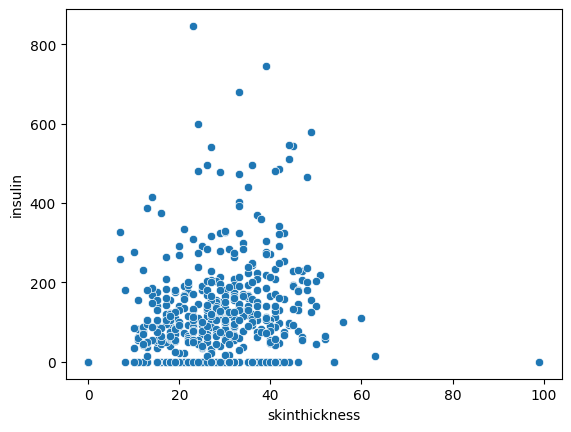

In [ ]:
sns.scatterplot(x=dataset['skinthickness'], y=dataset['insulin'])

<Axes: xlabel='bmi', ylabel='insulin'>

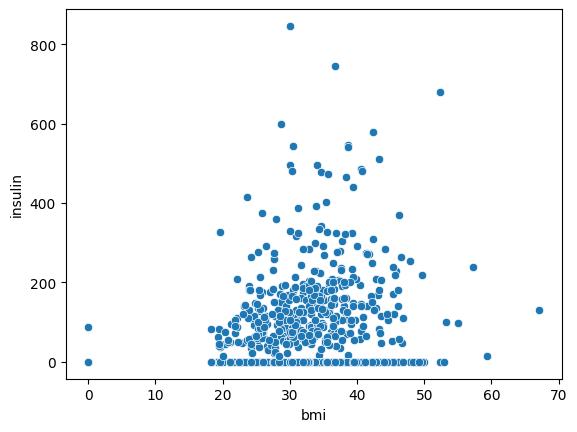

In [ ]:
sns.scatterplot(x=dataset['bmi'], y=dataset['insulin'])

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_regr,y_regr, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [ ]:
model_regr = LinearRegression()
model_regr.fit(X_train_r,y_train_r)

LinearRegression()

In [ ]:
model_regr.score(X_train_r, y_train_r)

0.1981194399422609

In [ ]:
y_pred = model_regr.predict(X_test_r)

In [ ]:

d={'y_pred' : y_pred, 'y_test': y_test_r, 'diff': np.abs(y_test_r-y_pred)}
pd.DataFrame(d)

,y_pred,y_test,diff
200,67.110671,0,67.110671
40,97.350096,70,27.350096
630,13.945078,0,13.945078
356,145.797812,167,21.202188
305,138.251305,105,33.251305
...,...,...,...
411,113.716149,176,62.283851
330,74.143671,0,74.143671
282,64.344121,155,90.655879
112,125.603961,37,88.603961


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['y_pred'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['y_test'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['diff'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_10, *['y_pred'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_11, *['y_test'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_12, *['diff'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_13, *[[['y_pred', 'y_test'], ['y_test', 'diff']]], **{})
chart